Installation might be different for different operating systems

Dependencies of geopandas http://geopandas.org/install.html
```shell
pip install geos
conda install shapely
conda install gdal
conda install fiona
pip install pyproj
pip install six
pip install geopandas
# If installation of geopandas is unsuccessful, export shapefile as a csv file and read it as a pandas dataframe
```
Install `matplotlib` and `scikit-learn`

In [38]:
import geopandas as gpd
import descartes #required for plotting polygons in geopandas
import numpy as np #library for vectorized computation

import matplotlib.pyplot as plt #plotting library
%matplotlib inline 
#rendering plots within the browser

print('Libraries imported.')

Libraries imported.


In [35]:
#Load the segments (polygons) as a GeoDataframe
    #The data was generated by Large-Scale Meanshift (OTB 6.6.1)
seg = gpd.read_file("C:\\Users\Jiachen\\Downloads\\Chanayethazan\\outputs\\SMS_OTB_fixed.shp")
seg.head()
#label - ID of each polygon
#nbPixels - number of pixels in each polygon
#mean and variance of the RGB bands (B0, B1, B2)

,label,nbPixels,meanB0,meanB1,meanB2,varB0,varB1,varB2,geometry
0,3,1221694,0.022083,0.022275,0.025561,1.071627,1.039830,1.253747,"POLYGON ((96.13320350646973 21.97935104370117,..."
1,70,54,35.814816,24.481482,17.666666,316.908447,295.160034,267.584900,"POLYGON ((96.05819821357727 21.98158264160156,..."
2,117,93,108.010750,102.655914,99.569893,337.097839,329.271729,330.834930,"POLYGON ((96.05816602706909 21.98120713233948,..."
3,87,129,37.178295,33.279068,29.108526,438.132080,442.093506,445.816284,"POLYGON ((96.05819821357727 21.98128223419189,..."
4,175,51,93.372551,87.392159,80.039215,85.398125,105.003754,67.398125,"POLYGON ((96.05819821357727 21.9810676574707, ..."


In [14]:
#Standardize data before PCA and KMeans
from sklearn.preprocessing import StandardScaler #for standardization

X = seg.values[:,1:-1] #excluding the first and last columns (label and geometry)
cluster_dataset = StandardScaler().fit_transform(X) #creating standard scalar (numpy array) from unscaled data a 
cluster_dataset

C:\Users\Jiachen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jiachen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.58161780e+02, -1.98815074e+00, -2.20912172e+00, ...,
        -1.35305210e+00, -1.32753546e+00, -1.27721454e+00],
       [-1.22630653e-02, -1.32038032e+00, -1.70012090e+00, ...,
        -4.83536779e-01, -4.67006159e-01, -5.18616928e-01],
       [-7.21346996e-03,  2.65497916e-02, -7.32958481e-02, ...,
        -4.27954324e-01, -3.67203044e-01, -3.38460301e-01],
       ...,
       [-2.03439779e-03, -4.18182593e-01, -1.71594607e-01, ...,
        -6.11364258e-01, -8.29951759e-01, -7.41130563e-01],
       [-8.37876120e-03,  9.24740778e-03, -7.13379067e-02, ...,
        -1.18954425e+00, -1.21383761e+00, -1.17899661e+00],
       [-1.01914365e-02, -1.28766995e-01,  7.05328191e-01, ...,
        -1.19460713e+00, -9.57663458e-01, -1.12782232e+00]])

In [18]:
#Perform principal component analysis (PCA) to determine the number of classes
from sklearn.decomposition import PCA
pca = PCA(n_components= cluster_dataset.shape[1] )
pca.fit(X)
print(pca.explained_variance_ratio_) #Proportion of variance explained by each of the selected components (summing up to 1.0)
print(pca.singular_values_) #The singular values corresponding to each of the selected components. 

[9.93680149e-01 5.81691039e-03 2.97570909e-04 1.14447879e-04
 8.78404990e-05 2.42544273e-06 6.55625632e-07]
[2.20764775e+06 1.68908949e+05 3.82033729e+04 2.36924704e+04
 2.07564878e+04 3.44906981e+03 1.79322355e+03]


It suggests we use k=4 or 5 for kmeans classification of the polygons (assume there are 4 or 5 classes of polygons in the input data).

In [30]:
#K-means classification
from sklearn.cluster import KMeans 

k_means = KMeans(init = "k-means++", n_clusters = 5)
# fit the X value to the model
k_means.fit(cluster_dataset)
classes = k_means.labels_
np.unique(classes, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([30522,  9038, 23306,     2, 18836], dtype=int64))

In [36]:
#Add a column to seg (GeoDataframe) to indicate the classes
seg['class'] = classes
seg.head()

,label,nbPixels,meanB0,meanB1,meanB2,varB0,varB1,varB2,geometry,class
0,3,1221694,0.022083,0.022275,0.025561,1.071627,1.039830,1.253747,"POLYGON ((96.13320350646973 21.97935104370117,...",3
1,70,54,35.814816,24.481482,17.666666,316.908447,295.160034,267.584900,"POLYGON ((96.05819821357727 21.98158264160156,...",0
2,117,93,108.010750,102.655914,99.569893,337.097839,329.271729,330.834930,"POLYGON ((96.05816602706909 21.98120713233948,...",4
3,87,129,37.178295,33.279068,29.108526,438.132080,442.093506,445.816284,"POLYGON ((96.05819821357727 21.98128223419189,...",0
4,175,51,93.372551,87.392159,80.039215,85.398125,105.003754,67.398125,"POLYGON ((96.05819821357727 21.9810676574707, ...",0


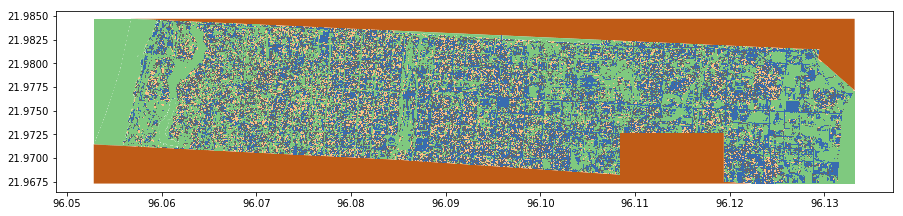

In [40]:
seg.plot(figsize= (15,10), column='class', legend=False, cmap = 'Accent')

In [45]:
#Save GeoDataframe to shapefile
seg.to_file("C:\\Users\\Jiachen\\Downloads\\Chanayethazan\\outputs\SMS_OTB_Kmeans.shp")